<div class="alert alert-block alert-info">



Business Case 1<a class="anchor"><a id='toc'></a></b><br>
* [<font color='#E8800A'>Import Libraries</font>](#first-bullet)<br>
- [<font color='#E8800A'>Extracting Time Series Data</font>](#second-bullet)<br>
- [<font color='#E8800A'>Data Exploration</font>](#third-bullet)<br>
- [<font color='#E8800A'>Missing Cases</font>](#fourth-bullet)<br>
- [<font color='#E8800A'>Encoding Categorical Features</font>](#fifth-bullet)<br>
- [<font color='#E8800A'>Data Partition</font>](#sixth-bullet)<br>
- [<font color='#E8800A'>Outliers</font>](#seventh-bullet)<br>
- [<font color='#E8800A'>Normalization</font>](#eighth-bullet)<br>
- [<font color='#E8800A'>Classification</font>](#nineth-bullet)<br>
- [<font color='#E8800A'>Features Selection</font>](#tenth-bullet)<br>
- [<font color='#E8800A'>Ballancing Dataset</font>](#eleventh-bullet)<br>
- [<font color='#E8800A'>Tuning Models</font>](#twelveth-bullet)<br>
- [<font color='#E8800A'>Models Performance Comparison</font>](#thirteenth-bullet)<br>
- [<font color='#E8800A'>Testing the Model</font>](#fourteenth-bullet)<br>
- [<font color='#E8800A'>Lift Curve</font>](#fifteenth-bullet)<br>

</div>



# <font color='#E8800A'>Import Libraries</font> <a class="anchor" id="first-bullet"></a>
[Back to TOC](#toc)

In [4]:
import numpy as np
import scipy
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.base import clone

# imports for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from itertools import product
from pandas_profiling import ProfileReport
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.cm as cm
sns.set()

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTENC
from collections import Counter
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
from sklearn.model_selection import RandomizedSearchCV

### Reading the dataset

In [5]:
df = pd.read_csv("H2.csv")

In [6]:
df = df.copy()

In [7]:
df.reset_index(inplace=True,drop=True) #To avoid duplicate misleading


# <font color='#E8800A'>Extracting Time Series Data</font> <a class="anchor" id="second-bullet"></a>
[Back to TOC](#toc)

In [8]:
df_time_series = df

In [9]:
df_time_series

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
c=df_time_series.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [11]:
time_series = pd.DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
time_series

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
79325,2017,35
79326,2017,35
79327,2017,35
79328,2017,35


In [12]:
#concatenate dates
time_series1 = time_series['ArrivalDateYear'].map(str) + time_series['ArrivalDateWeekNumber'].map(str)
print (time_series1)
time_series1=pd.DataFrame(time_series1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
79325    201735
79326    201735
79327    201735
79328    201735
79329    201735
Length: 79330, dtype: object


In [13]:
#Dataframe for the time series method including both canceled and not canceled
full_df_time_series=pd.concat([time_series1, c['IsCanceled']], axis = 1)
full_df_time_series.columns = ['FullDate', 'IsCanceled']
full_df_time_series

,FullDate,IsCanceled
0,201527,0
1,201527,1
2,201527,1
3,201527,1
4,201527,1
...,...,...
79325,201735,0
79326,201735,0
79327,201735,0
79328,201735,0


## Time Series Canceled

In [14]:
is_canceled_timeseries = full_df_time_series.groupby('FullDate').agg(sum)
is_canceled_timeseries.sort_values(['FullDate'], ascending=True)
is_canceled_timeseries

,IsCanceled
FullDate,
201527,97
201528,153
201529,228
201530,321
201531,159
...,...
20175,211
20176,148
20177,295


## Time Series Not Canceled

In [15]:
is_not_canceled_timeseries= full_df_time_series.loc[(full_df_time_series.IsCanceled == 0)]
is_not_canceled_timeseries = is_not_canceled_timeseries.groupby('FullDate').count()
is_not_canceled_timeseries.rename(index=str, columns={'IsCanceled': 'IsnotCanceled'},inplace = True)
is_not_canceled_timeseries.sort_values(['FullDate'], ascending=True)

,IsnotCanceled
FullDate,
201527,85
201528,61
201529,124
201530,132
201531,73
...,...
20175,287
20176,314
20177,424


# <font color='#E8800A'>Data Exploration</font> <a class="anchor" id="third-bullet"></a>
[Back to TOC](#toc)

### Initial Analysis

In [16]:
df.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
5,1,79,2015,July,27,2,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-06-25
6,0,3,2015,July,27,2,0,3,1,0.0,...,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
7,1,63,2015,July,27,2,1,3,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,0,Canceled,2015-06-25
8,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02


In [17]:
# dataset data types
df.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [18]:
df.Company.value_counts()

       NULL    75641
         40      924
         67      267
         45      250
        153      215
               ...  
        278        1
        460        1
        255        1
        417        1
        213        1
Name: Company, Length: 208, dtype: int64

In [19]:
# count of missing values
df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [20]:
pd.DataFrame(df == ' ').sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

In [21]:
# duplicated observations
df.duplicated().sum()

25902

In [22]:
# descriptive statistics
df.describe(include="all").T  # try with all and without all

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330,NaN,NaN,NaN,0.41727,0.493111,0,0,0,1,1
LeadTime,79330,NaN,NaN,NaN,109.736,110.949,0,23,74,163,629
ArrivalDateYear,79330,NaN,NaN,NaN,2016.17,0.699181,2015,2016,2016,2017,2017
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330,NaN,NaN,NaN,27.1774,13.3985,1,17,27,38,53
ArrivalDateDayOfMonth,79330,NaN,NaN,NaN,15.7866,8.72845,1,8,16,23,31
StaysInWeekendNights,79330,NaN,NaN,NaN,0.795185,0.885026,0,0,1,2,16
StaysInWeekNights,79330,NaN,NaN,NaN,2.18296,1.45642,0,1,2,3,41
Adults,79330,NaN,NaN,NaN,1.85098,0.509292,0,2,2,2,4
Children,79326,NaN,NaN,NaN,0.0913698,0.372177,0,0,0,0,3


In [23]:
df["IsCanceled"].value_counts()

0    46228
1    33102
Name: IsCanceled, dtype: int64

In [24]:
#Defining types of variables
target_variable = ["IsCanceled"]
integer_variables= ["LeadTime", "ArrivalDateYear","ArrivalDateDayOfMonth", "StaysInWeekendNights",\
                     "StaysInWeekNights", "Adults", "Children", "Babies","DaysInWaitingList" , 'ADR',\
                    'BookingChanges','PreviousBookingsNotCanceled','PreviousCancellations',\
                    'RequiredCarParkingSpaces','TotalOfSpecialRequests']
categorical = ['Country','CustomerType','DepositType','DistributionChannel','MarketSegment','Meal',\
               'ArrivalDateMonth','IsRepeatedGuest','ReservedRoomType','AssignedRoomType']

# <font color='#E8800A'>Missing Cases</font> <a class="anchor" id="fourth-bullet"></a>
[Back to TOC](#toc)

# Categorical

In [25]:
# Creating a copy to apply central tendency measures imputation
df_central = df.copy()

In [26]:
modes = df_central['Country'].mode().loc[0]
modes

'PRT'

In [27]:
df_central['Country'].fillna(modes, inplace=True)
df_central.isna().sum()  # checking how many NaNs we still have

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

In [28]:
df_central.shape

(79330, 31)

## Numerical

In [29]:
# Creating new df copy to explore neighbordhood imputation
df_neighbors = df_central.copy()

In [30]:
# Seeing rows with NaNs
nans_index = df_neighbors.isna().any(axis=1)
df_neighbors[nans_index]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
540,1,2,2015,August,32,3,1,0,2,NaN,...,No Deposit,NULL,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
607,1,1,2015,August,32,5,0,2,2,NaN,...,No Deposit,14,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
619,1,1,2015,August,32,5,0,2,3,NaN,...,No Deposit,NULL,NULL,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
1100,1,8,2015,August,33,13,2,5,2,NaN,...,No Deposit,9,NULL,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [31]:
# KNNImputer - only works for numerical varaibles
imputer = KNNImputer(n_neighbors=3, weights="uniform")
df_neighbors[integer_variables] = imputer.fit_transform(df_neighbors[integer_variables])

In [32]:
# See rows with NaNs imputed
df_neighbors.loc[nans_index, integer_variables]

,LeadTime,ArrivalDateYear,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,DaysInWaitingList,ADR,BookingChanges,PreviousBookingsNotCanceled,PreviousCancellations,RequiredCarParkingSpaces,TotalOfSpecialRequests
540,2.0,2015.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,1.0
607,1.0,2015.0,5.0,0.0,2.0,2.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,1.0
619,1.0,2015.0,5.0,0.0,2.0,3.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,2.0
1100,8.0,2015.0,13.0,2.0,5.0,2.0,0.0,0.0,0.0,76.5,0.0,0.0,0.0,0.0,1.0


In [33]:
df = df_neighbors

In [34]:
df_neighbors.shape

(79330, 31)

In [35]:
df = df.copy()
drop_features = ['ArrivalDateYear','ADR','ArrivalDateMonth','Agent','Company','AssignedRoomType','ReservationStatusDate','ReservationStatus']
keep_features = df.columns.drop(drop_features).to_list()
df_1 = df[keep_features]

In [36]:
categorical_1 = ['Country','CustomerType','DepositType','DistributionChannel','MarketSegment','Meal',\
               'IsRepeatedGuest','ReservedRoomType']
integer_variables_1= ["LeadTime","ArrivalDateDayOfMonth", "StaysInWeekendNights",\
                     "StaysInWeekNights", "Adults", "Children", "Babies","DaysInWaitingList",\
                    'BookingChanges','PreviousBookingsNotCanceled','PreviousCancellations',\
                    'RequiredCarParkingSpaces','TotalOfSpecialRequests']

# <font color='#E8800A'>Encoding Categorical Features</font> <a class="anchor" id="fifth-bullet"></a>
[Back to TOC](#toc)

### Feature Encoding (One-hot encoding)

In [37]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_1[categorical_1])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_1.index, columns=ohc_feat_names)
ohc_df.head()

,x0_AGO,x0_AIA,x0_ALB,x0_AND,x0_ARE,x0_ARG,x0_ARM,x0_ASM,x0_ATA,x0_ATF,...,x5_HB,x5_SC,x6_1,x7_B,x7_C,x7_D,x7_E,x7_F,x7_G,x7_P
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Reassigning df to contain ohc variables
df_1_ohc = pd.concat([df_1.drop(columns=categorical_1), ohc_df], axis=1)
df_1_ohc.head()

,IsCanceled,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,...,x5_HB,x5_SC,x6_1,x7_B,x7_C,x7_D,x7_E,x7_F,x7_G,x7_P
0,0,6.0,27,1.0,0.0,2.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,88.0,27,1.0,0.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,65.0,27,1.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,92.0,27,1.0,2.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,100.0,27,2.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# <font color='#E8800A'>Data Partition</font> <a class="anchor" id="sixth-bullet"></a>
[Back to TOC](#toc)

Create an object named __data__ that will contain your independent variables and another object named __target__ that will contain your independent varaible / target (the last column in the dataset)

In [39]:
target = ["IsCanceled"]
features= df_1_ohc.columns.drop(target).to_list()
data =df_1_ohc[features]
target= df_1_ohc[target]

## The train-test split
In this approach we randomly split the complete data into training and test sets. Then Perform the model training on the training set and use the test set for validation purpose, ideally split the data into 70:30 or 80:20. With this approach there is a possibility of high bias if we have limited data, because we would miss some information about the data which we have not used for training. If our data is huge and our test sample and train sample has the same distribution then this approach is acceptable.

X_train_val, X_test, y_train_val, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=target
                                                   )

print('train_val:{}% | test:{}%'.format(round(len(y_train_val)/len(target),2),
                                                     round(len(y_test)/len(target),2)
                                                    ))

# <font color='#E8800A'>Outliers</font> <a class="anchor" id="seventh-bullet"></a>
[Back to TOC](#toc)

# LOF

In [40]:
lof = LocalOutlierFactor(contamination = 0.05)
lof_out = pd.Series(lof.fit_predict(df_1_ohc[integer_variables_1]))
lof_out.value_counts(normalize = True)

 1    0.949994
-1    0.050006
dtype: float64

In [41]:
df_outliers = df_1_ohc[lof_out.values == -1]

# <font color='#E8800A'>Normalization</font> <a class="anchor" id="eighth-bullet"></a>
[Back to TOC](#toc)

In [42]:
#copy dataframe to use minimax scale
df_minmax_X = df_1_ohc.copy()
#df_minmax_X_val = X_val.copy()

In [43]:
# Create a MinMaxScaler instance and fit to your train data
min_max = MinMaxScaler().fit(df_minmax_X[integer_variables_1])
# Transform X_train data by applying the scale obtained in the first command
min_max_X_train = min_max.transform(df_minmax_X[integer_variables_1])


In [44]:
# Update the dataframe with the scaled features
df_minmax_X[integer_variables_1] = min_max_X_train
df_minmax_X

,IsCanceled,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,...,x5_HB,x5_SC,x6_1,x7_B,x7_C,x7_D,x7_E,x7_F,x7_G,x7_P
0,0,0.009539,27,0.000000,0.000,0.048780,0.25,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.139905,27,0.000000,0.000,0.097561,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.103339,27,0.000000,0.000,0.097561,0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.146264,27,0.000000,0.125,0.097561,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.158983,27,0.033333,0.000,0.048780,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,0.036566,35,0.966667,0.125,0.121951,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79326,0,0.162162,35,1.000000,0.125,0.121951,0.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
79327,0,0.054054,35,1.000000,0.125,0.121951,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
79328,0,0.173291,35,1.000000,0.125,0.121951,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df_minmax_X.to_csv('H2_preprocessdone.csv', header=False, index=False)

## SPLIT TRAIN_TEST

In [54]:
target = ["IsCanceled"]
features= df_minmax_X.columns.drop(target).to_list()
data =df_1_ohc[features]
target= df_1_ohc[target]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=target
                                                   )


In [64]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size = 0.25,
                                                  random_state = 15,
                                                  shuffle=True,
                                                  stratify=y_train_val
)

# <font color='#E8800A'>Classification</font> <a class="anchor" id="nineth-bullet"></a>
[Back to TOC](#toc)

## Create a function that will print the results of the classification report

In [51]:
model = list()
resample = list()
F1score_0 = list()
F1score_1 = list()
F1score_total = list()
precision = list()
AUCROC = list()

In [52]:
def test_eval(Clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob = Clf_model.predict_proba(X_test)
    y_pred = Clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n") #, labels=[0,1]
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    resample.append(sampling)
    F1score_0.append(f1_score(y_test, y_pred, average='micro', labels=[0]))
    F1score_1.append(f1_score(y_test, y_pred, average='micro', labels=[1]))
    F1score_total.append(f1_score(y_test,y_pred, average='micro'))
    precision.append(precision_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))

In [59]:
y_pred_RF.shape

(63464,)

### 1) Apply the Random Forest Classifier

In [65]:
#Random Forest Classifier
RF0 = RandomForestClassifier()
RF0.fit(X_train, y_train)
y_pred_RF = RF0.predict(X_val)
f1_score_RF = f1_score(y_val, y_pred_RF, average='micro')
print('The f1_score of the Random Forest is:', f1_score_RF)
test_eval(RF0, X_val, y_val, 'Random Forest', sampling=None)


The f1_score of the Random Forest is: 0.8636707424681709
Confusion Matrix
[[8530  716]
 [1447 5173]] 

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      9246
           1       0.88      0.78      0.83      6620

    accuracy                           0.86     15866
   macro avg       0.87      0.85      0.86     15866
weighted avg       0.86      0.86      0.86     15866
 

AUC-ROC
0.9384276649721313


## 2) Apply the Gradient Boost Classifier

In [66]:
GB0 = GradientBoostingClassifier(random_state = 5)
GB0.fit(X_train, y_train)
y_pred_GB = GB0.predict(X_val)
f1_score_GB = f1_score(y_val, y_pred_GB, average='micro')
print('The f1_score of the Gradient Boosting is:', f1_score_GB)
test_eval(GB0, X_val, y_val, "Gradient Boosting", sampling=None)

The f1_score of the Gradient Boosting is: 0.8228286902811043
Confusion Matrix
[[8274  972]
 [1839 4781]] 

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      9246
           1       0.83      0.72      0.77      6620

    accuracy                           0.82     15866
   macro avg       0.82      0.81      0.81     15866
weighted avg       0.82      0.82      0.82     15866
 

AUC-ROC
0.9066290117780988


# <font color='#E8800A'>Feature Selection</font> <a class="anchor" id="tenth-bullet"></a>
[Back to TOC](#toc)

## Feature Importance GB


In [69]:
importances_GB = pd.DataFrame({'feature':X_val.columns,'importance':np.round(GB0.feature_importances_,3)})
importances_GB = importances_GB.sort_values('importance',ascending=False)


## Feature Importance RF

In [70]:
importances_RF = pd.DataFrame({'feature':X_val.columns,'importance':np.round(RF0.feature_importances_,3)})
importances_RF = importances_RF.sort_values('importance',ascending=False)


In [71]:
features_selected_RF = importances_RF[(importances_RF['importance']> 0.002)]

In [72]:
features_selected_GB = importances_GB[(importances_GB['importance']> 0.002)]

In [73]:
features_selected = set(list(features_selected_GB['feature']) + list(features_selected_RF['feature']))

# <font color='#E8800A'>Ballancing Dataset</font> <a class="anchor" id="eleventh-bullet"></a>
[Back to TOC](#toc)

## Resample to balance the dataset with SMOTE-NC

In [74]:
features_selected_1 = ['Adults','ArrivalDateDayOfMonth','ArrivalDateWeekNumber','BookingChanges','Children','DaysInWaitingList','LeadTime',\
'PreviousBookingsNotCanceled','PreviousCancellations','RequiredCarParkingSpaces','StaysInWeekNights','StaysInWeekendNights',\
'TotalOfSpecialRequests','x0_AUT','x0_BEL','x0_BRA','x0_CHE','x0_CHN','x0_DEU','x0_ESP','x0_FRA','x0_GBR','x0_ITA','x0_PRT',\
'x0_USA','x1_Transient','x1_Transient-Party','x2_Non Refund     ','x3_Direct','x3_TA/TO','x4_Corporate','x4_Direct',\
'x4_Groups','x4_Offline TA/TO','x4_Online TA','x5_HB       ','x5_SC       ','x6_1','x7_D               ','x7_E               ','x7_F               '] 

In [76]:
# Set the range of categorical feature
cat_indices1 = list(range(13,X_train.shape[1]))
#apply smotenc for the dataset
sm = SMOTENC(random_state=5, categorical_features=cat_indices1, k_neighbors=14)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# print the original and resampled dataset
print('Original dataset samples per class {}'.format(Counter(y_train['IsCanceled'])))
print('Resampled dataset samples per class {}'.format(Counter(y_train_res['IsCanceled'])))

Original dataset samples per class Counter({0: 27736, 1: 19862})
Resampled dataset samples per class Counter({0: 27736, 1: 27736})


### 1) Apply the Random Forest Classifier with ballanced dataset

In [77]:
#Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train_res[features_selected_1], y_train_res)
y_pred_RF = RF.predict(X_val[features_selected_1])
f1_score_RF = f1_score(y_val, y_pred_RF, average='micro')
print('The f1_score of the Random Forest is:', f1_score_RF)
test_eval(RF, X_val[features_selected_1], y_val, 'Random Forest', sampling=None)

The f1_score of the Random Forest is: 0.8643640489096179
Confusion Matrix
[[8429  817]
 [1335 5285]] 

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      9246
           1       0.87      0.80      0.83      6620

    accuracy                           0.86     15866
   macro avg       0.86      0.85      0.86     15866
weighted avg       0.86      0.86      0.86     15866
 

AUC-ROC
0.9379127611646222


### 2) Apply the Gradient Boost Classifier with ballanced dataset

In [78]:
GB = GradientBoostingClassifier(random_state = 5)
GB.fit(X_train_res[features_selected_1], y_train_res)
y_pred_GB = GB.predict(X_val[features_selected_1])
f1_score_GB = f1_score(y_val, y_pred_GB, average='micro')
print('The f1_score of the Gradient Boosting is:', f1_score_GB)
test_eval(GB, X_val[features_selected_1], y_val, "Gradient Boosting", sampling=None)

The f1_score of the Gradient Boosting is: 0.8233959410059246
Confusion Matrix
[[8033 1213]
 [1589 5031]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      9246
           1       0.81      0.76      0.78      6620

    accuracy                           0.82     15866
   macro avg       0.82      0.81      0.82     15866
weighted avg       0.82      0.82      0.82     15866
 

AUC-ROC
0.9040544028837816


# <font color='#E8800A'>Tuning Models</font> <a class="anchor" id="twelveth-bullet"></a>
[Back to TOC](#toc)

## 1) Tuning Random Forest Classifier

### Maximum Depth

In [79]:
def max_depths_tuning(train_sample, y_train_sample, x_val_sample, y_val_sample, list_max_depths):
    max_depths  = list_max_depths #, 0.1, 0.05, 0.01]
    train_results = []
    val_results = []
    for max_depth in max_depths:
        RF = RandomForestClassifier(max_depth=max_depth)
        RF.fit(train_sample, y_train_sample)
        train_pred = RF.predict(train_sample)
        f1_score_ = f1_score(y_train_sample, train_pred)
        train_results.append(f1_score_)
        y_pred = RF.predict(x_val_sample)
        f1_score_ = f1_score(y_val_sample, y_pred)
        val_results.append(f1_score_)
    from matplotlib.legend_handler import HandlerLine2D
    line1, = plt.plot(max_depths, train_results, "b", label="Train f1_score")
    line2, = plt.plot(max_depths, val_results, "r", label="val f1_score")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("f1 score")
    plt.xlabel("Max depths")
    plt.show()

In [81]:
max_depths = np.linspace(13, 17, 5, endpoint=True)
max_depths

array([13., 14., 15., 16., 17.])

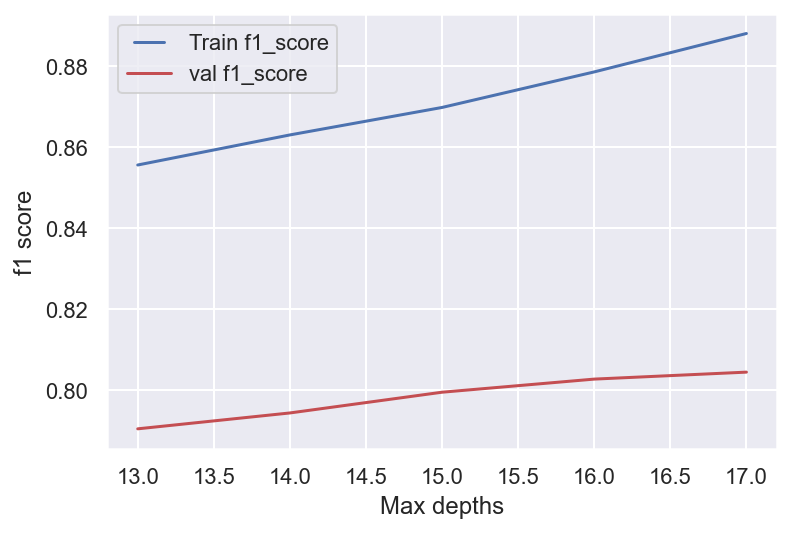

In [82]:
max_depths_tuning(X_train_res[features_selected_1], y_train_res, X_val[features_selected_1], y_val, max_depths)

### Number of samples

In [83]:
def nr_samples_tuning(train_sample, y_train_sample, x_val_sample, y_val_sample, list_nr_samples):
    nr_samples = list_nr_samples#np.linspace(0.1, 1.0, 10, endpoint=True)
    train_results = []
    val_results = []
    for nr_sample in nr_samples:
        RF = RandomForestClassifier(min_samples_split=nr_sample)
        RF.fit(train_sample, y_train_sample)
        train_pred = RF.predict(train_sample)
        f1_score_ = f1_score(y_train_sample, train_pred)
        train_results.append(f1_score_)
        y_pred = RF.predict(x_val_sample)
        f1_score_ = f1_score(y_val_sample, y_pred)
        val_results.append(f1_score_)
    from matplotlib.legend_handler import HandlerLine2D
    line1, = plt.plot(nr_samples, train_results, "b", label="Train f1_score")
    line2, = plt.plot(nr_samples, val_results, "r", label="val f1_score")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("f1 score")
    plt.xlabel("nr_samples")
    plt.show()

In [84]:
mim= np.linspace(0.1, 0.6, 8, endpoint=True)
mim

array([0.1       , 0.17142857, 0.24285714, 0.31428571, 0.38571429,
       0.45714286, 0.52857143, 0.6       ])

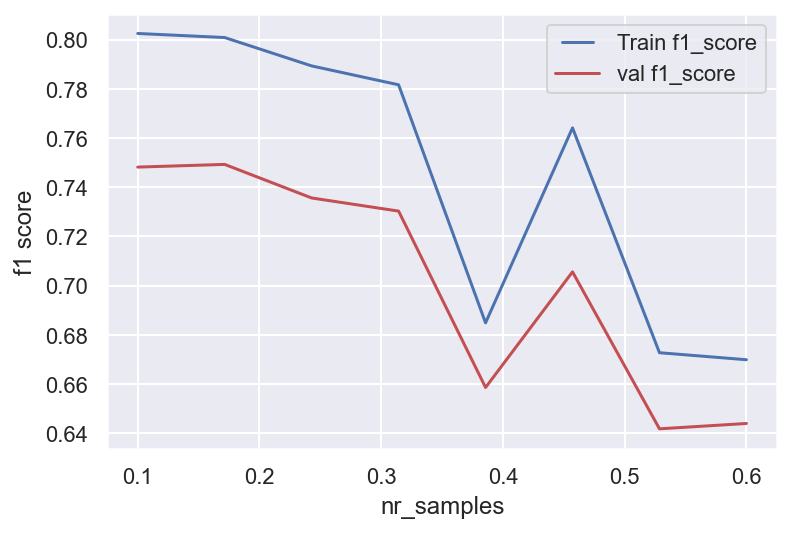

In [85]:
nr_samples_tuning(X_train_res[features_selected_1], y_train_res, X_val[features_selected_1], y_val, mim)

### Number of estimators

In [86]:
def n_estimators_tuning(train_sample, y_train_sample, x_val_sample, y_val_sample, list_n_estimators):
    n_estimators = list_n_estimators
    train_results = []
    val_results = []
    for n_estimator in n_estimators:
        RF = RandomForestClassifier(n_estimators=n_estimator)
        RF.fit(train_sample, y_train_sample)
        train_pred = RF.predict(train_sample)
        f1_score_ = f1_score(y_train_sample, train_pred)
        train_results.append(f1_score_)
        y_pred = RF.predict(x_val_sample)
        f1_score_ = f1_score(y_val_sample, y_pred)
        val_results.append(f1_score_)
    from matplotlib.legend_handler import HandlerLine2D
    line1, = plt.plot(n_estimators, train_results, "b", label="Train f1_score")
    line2, = plt.plot(n_estimators, val_results, "r", label="val f1_score")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("f1 score")
    plt.xlabel("n_estimators")
    plt.show()

In [87]:
n_estimators=list(range(1,42))

In [88]:
n_estimators_tuning(X_train_res[features_selected_1], y_train_res, X_val[features_selected_1], y_val, n_estimators)

KeyboardInterrupt: 

### Best parameters combination Random Search with Cross Validation

In [ ]:
#Random Hyperparameter Grid
#n_estimators = list(range(1,50))
#max_features = ['sqrt', 'log2']
max_depth = np.linspace(13, 17, 5, endpoint=True)
#min_samples_split = np.linspace(0.1, 0.6, 8, endpoint=True)
#min_samples_leaf = [1, 2, 4]
bootstrap = [True,False]
#max_samples = [0.2, 0.4, 0.6, 0.8, 1.0]
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'max_samples': max_samples,
               'bootstrap': bootstrap}
RF = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
RF_best = RandomizedSearchCV(estimator = RF, param_distributions = random_grid,\
                        n_iter = 200, cv = cv, scoring='f1_micro', verbose=2, random_state=42, n_jobs = -1)
RF_best.fit(X_train_res[features_selected_1], y_train_res)

Fitting 15 folds for each of 200 candidates, totalling 3000 fits


In [ ]:
# Print best parameter for the model
RF_best.best_estimator_

In [ ]:
y_pred_RF_best = RF_best.predict(X_train_res[features_selected_1])
f1_score_RF_best = f1_score(y_train_res, y_pred_RF_best, average='micro')
print('The f1_score of the Best Random Forest is:', f1_score_RF_best)
test_eval(RF_best, X_val[features_selected_1], y_val, 'Random Forest', 'SMOTENC')

# <font color='#E8800A'>Testing the Model</font> <a class="anchor" id="fourteenth-bullet"></a>
[Back to TOC](#toc)

## Processing the test data

In [ ]:
# Transform X_val data by applying the scale obtained in the first command
min_max_X_test = min_max.transform(X_test[integer_variables_1])

In [ ]:
# Update the dataframe with the scaled features
X_test[integer_variables_1] = min_max_X_test

## Evaluating the test data

In [ ]:
test_eval(RF, X_test[features_selected_1], y_test, 'Random Forest', sampling=None)

# <font color='#E8800A'>Lift Curves</font> <a class="anchor" id="fifteenth-bullet"></a>
[Back to TOC](#toc)

# Plot lift curves Random forest

In [ ]:
# Plot lift curves
predicted_probas = RF.predict_proba(X_test[features_selected_1])

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
plot_cumulative_gain(y_test, predicted_probas, ax=ax1)
plot_lift_curve(y_test, predicted_probas, ax=ax2)  # Lift is a measure of the effectiveness of a predictive model
                                                   # calculated as the ratio between the results obtained with and 
                                                   # without the predictive model.
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()